# Optimization of Sales and Customer Payment Analysis in Brazilian E-Commerce

---


**Team Members :** Achinthya Sreedha, Bilvika Basetty,  Kaushki Tiwary, Saketh Bollina, Crystal Leatvanich

Olist, a leading Brazilian e-commerce platform, experienced significant growth between 2016 and 2018, with revenue peaking at 1.2 million before stabilizing in 2018. Key revenue drivers were categories like lifestyle, personal care, and accessories, while the electronics category underperformed, highlighting an opportunity for targeted marketing. Product weight and price showed a positive correlation, and longer delivery times negatively impacted customer satisfaction. Credit cards were the preferred payment method, particularly for larger transactions, while vouchers demonstrated potential for boosting repeat purchases and customer retention.Logistics saw improvements, but some delivery delays in 2018 suggested room for optimization. Geographically, regions like AM and SE displayed high Customer Lifetime Value (CLV), while growth opportunities existed in underperforming areas such as MS and AP. Customer feedback revealed dissatisfaction with incorrect or poor-quality products, contributing to order cancellations. Moving forward, improving product quality, enhancing logistics, and leveraging targeted marketing in growth regions will be essential for sustaining Olist’s success and increasing customer loyalty.

# Table of Contents
I. Company Introduction and Business Problem Definition<br>
II. Data Source <br>
III. Data Cleaning<br>
IV. Exploratory Data Analysis and Visualizations <br>
V. Challenges
VI. Conclusion<br>
VII. Appendix<br>
VIII. Gen AI Disclosure<br>



# I. Company Introduction and Business Problem Definition

___

**Company Introduction**

Olist is one of Brazil's largest e-commerce platforms, founded with the mission of helping small and medium-sized businesses succeed in the competitive online marketplace. By providing a unified platform that connects sellers with major e-commerce channels, Olist enables businesses to reach a broader customer base and streamline their sales processes. With a focus on delivering seamless logistics, payment integration, and customer support

**Data Source**

We will be using the comprehensive dataset available on Kaggle, which contains actual transactional data from Olist, a prominent Brazilian e-commerce platform. This dataset spans from 2016 to 2018 and includes detailed information on customer orders, payments, product listings, reviews, sellers, and delivery logistics. This dataset, publicly shared by Olist for research and analytical purposes, is available through this [link.](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)



**Problem Definition**

 This project aims to analyze the Brazilian e-commerce landscape using customer, product, and delivery data to enhance business process optimization. Specifically, we will:

> - Identify key customer segments based on purchase behavior and demographics.

> - Analyze product performance to optimize inventory and product recommendations.

> - Aim to understand the impact of payment preferences on consumer segment and behaviour.

> - Analyze customer vs seller concentrations and delivery times.

**Motivation**

In a dynamic market like E-commerce the competition is fierce and the degree of customer engagement and satisfaction is the key factor determining success. This project analyzes the sales and payment trends to provide actionable insight contributing towards business process optimization.Our goal is to derive actionable insights that can optimize business processes such as customer satisfaction, product sales performance, inventory management, and delivery logistics. The dataset, collected from 2016 to 2018, provides an opportunity to explore patterns in customer behavior and propose improvements for business operations and targeted marketing.







# II. Data Source

___

Mounted Dataset from Google Cloud

In [1]:
from google.colab import auth
auth.authenticate_user()

In [2]:
# Add the correct source list for gcsfuse
!echo "deb https://packages.cloud.google.com/apt gcsfuse-$(lsb_release -c -s) main" | sudo tee /etc/apt/sources.list.d/gcsfuse.list

# Import the Google Cloud public key
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -

# Update package list and install gcsfuse
!sudo apt-get update
!sudo apt-get install gcsfuse

deb https://packages.cloud.google.com/apt gcsfuse-jammy main
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: apt-key is deprecated. Manage keyring files in trusted.gpg.d instead (see apt-key(8)).
100  1022  100  1022    0     0   7116      0 --:--:-- --:--:-- --:--:--  7146
OK
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://packages.cloud.google.com/apt gcsfuse-jammy InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Ign:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy Release
Ign:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Ign:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Ign:9 https://

In [3]:
!mkdir olist
!gcsfuse --implicit-dirs olist-database olist


mkdir: cannot create directory ‘olist’: File exists
{"timestamp":{"seconds":1729146779,"nanos":260154115},"severity":"INFO","message":"Start gcsfuse/2.5.1 (Go version go1.23.0) for app \"\" using mount point: /content/olist\n"}
{"timestamp":{"seconds":1729146779,"nanos":260220826},"severity":"INFO","message":"GCSFuse config","config":{"AppName":"","CacheDir":"","Debug":{"ExitOnInvariantViolation":false,"Fuse":false,"Gcs":false,"LogMutex":false},"EnableHns":true,"FileCache":{"CacheFileForRangeRead":false,"DownloadChunkSizeMb":50,"EnableCrc":false,"EnableODirect":false,"EnableParallelDownloads":false,"MaxParallelDownloads":16,"MaxSizeMb":-1,"ParallelDownloadsPerFile":16,"WriteBufferSize":4194304},"FileSystem":{"DirMode":"755","DisableParallelDirops":false,"FileMode":"644","FuseOptions":[],"Gid":-1,"IgnoreInterrupts":true,"KernelListCacheTtlSecs":0,"RenameDirLimit":0,"TempDir":"","Uid":-1},"Foreground":false,"GcsAuth":{"AnonymousAccess":false,"KeyFile":"","ReuseTokenFromUrl":true,"TokenUr

# III. Data Cleaning
___

This section outlines the data cleaning processes applied to the Olist provided dataset. Leading and trailing spaces and zeros, were checked and handled to maintain consistency and prevent issues in dcomparisons and interpretations. Key volumns were converted, split, or calculated to allow for utilization in our analysis. Missing values were visualized using a matrix, allowing us to identify rows for removal as these gaps could introduce bias. Through the cleaning process, we ensured the founation of our analysis is reliable, leading to more accurate and meaningful insights.

In [4]:
import pandas as pd

olist_customers = pd.read_csv('olist/Olist dataset/olist_customers_dataset.csv')
olist_customers.info()

#Check for leading or trailing spaces/zeros
print(olist_customers['customer_zip_code_prefix'].astype(str).str.contains(r'^\s|\s$').any())
print(olist_customers['customer_zip_code_prefix'].astype(str).str.startswith('0').any())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
False
False


In [5]:
olist_order_items = pd.read_csv('olist/Olist dataset/olist_order_items_dataset.csv')
olist_order_items.head()

olist_order_items['shipping_limit_date'] = pd.to_datetime(olist_order_items['shipping_limit_date'])

#Split the columns
olist_order_items['date'] = olist_order_items['shipping_limit_date'].dt.date
olist_order_items['time'] = olist_order_items['shipping_limit_date'].dt.time

olist_order_items.head()

olist_order_items.to_csv('olist/Olist dataset/updated_olist_order_items.csv', index=False)

In [6]:
olist_order_reviews = pd.read_csv('olist/Olist dataset/olist_order_reviews_dataset.csv')

#Ensure correct datatype
olist_order_reviews['review_creation_date'] = pd.to_datetime(olist_order_reviews['review_creation_date'])
olist_order_reviews['review_answer_timestamp'] = pd.to_datetime(olist_order_reviews['review_answer_timestamp'])

olist_order_reviews['response_time'] = olist_order_reviews['review_answer_timestamp'] - olist_order_reviews['review_creation_date']

olist_order_reviews.head()

olist_order_reviews.to_csv('olist/Olist dataset/updated_olist_order_reviews.csv', index=False)

In [7]:
olist_orders = pd.read_csv('olist/Olist dataset/olist_orders_dataset.csv')

#correct datatype
olist_orders['order_purchase_timestamp'] = pd.to_datetime(olist_orders['order_purchase_timestamp'])
olist_orders['order_approved_at'] = pd.to_datetime(olist_orders['order_approved_at'])
olist_orders['order_delivered_carrier_date'] = pd.to_datetime(olist_orders['order_delivered_carrier_date'])
olist_orders['order_delivered_customer_date'] = pd.to_datetime(olist_orders['order_delivered_customer_date'])
olist_orders['order_estimated_delivery_date'] = pd.to_datetime(olist_orders['order_estimated_delivery_date'])

olist_orders.head()

olist_orders.to_csv('olist/Olist dataset/updated_olist_orders.csv', index=False)



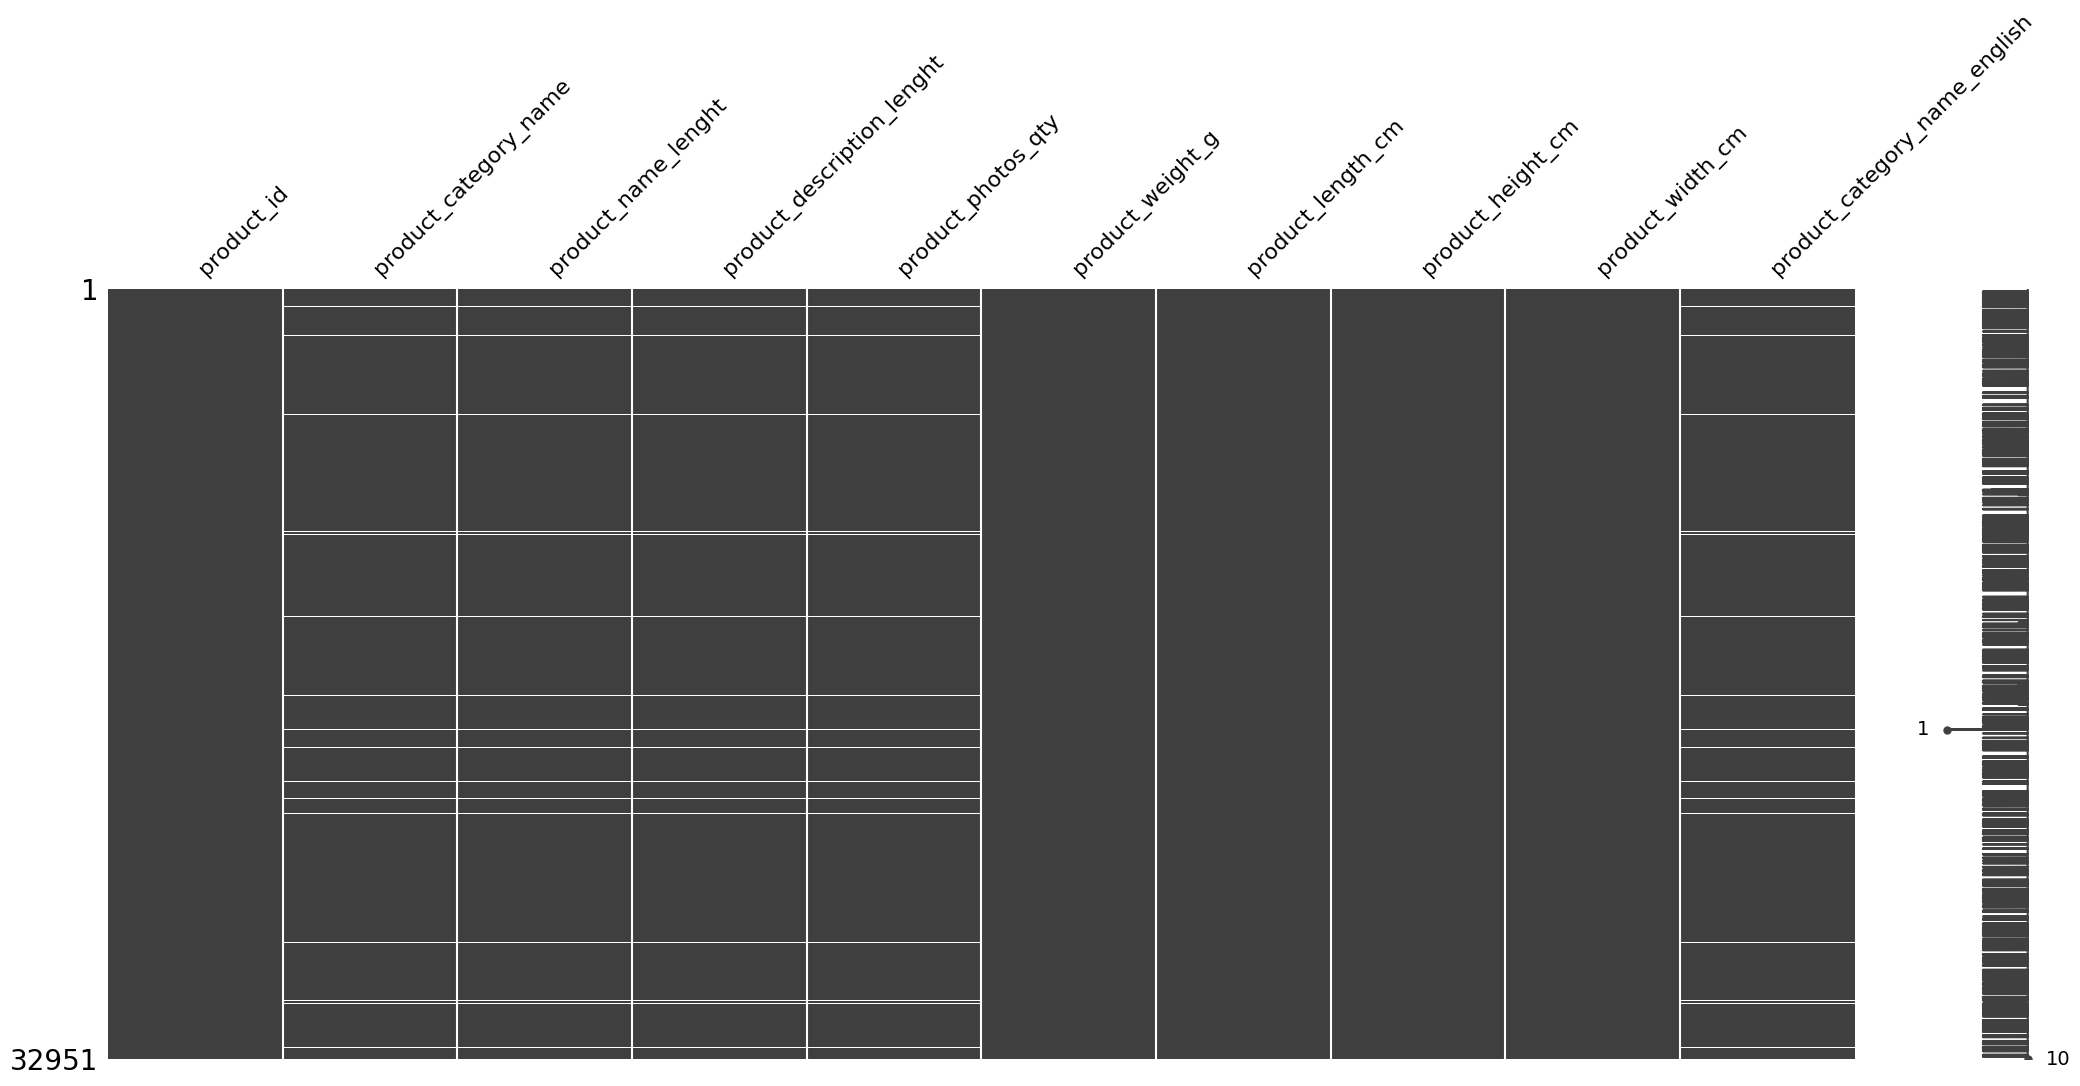

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB
Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_phot

In [8]:
import missingno as msno
import matplotlib.pyplot as plt

olist_products = pd.read_csv('olist/Olist dataset/olist_products_dataset.csv')
translation = pd.read_csv('olist/Olist dataset/product_category_name_translation.csv')

merged_df = pd.merge(olist_products, translation, on='product_category_name', how='left')

#check for missing values
msno.matrix(merged_df)
plt.show()
merged_df.info()

df_cleaned = merged_df.dropna()
print(df_cleaned.columns)

#reorder columns
reorder = ['product_id', 'product_category_name',
       'product_category_name_english', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm']

df_reorder = df_cleaned[reorder]

df_reorder.head()

df_reorder.to_csv('olist/Olist dataset/updated_olist_products.csv', index=False)

In [9]:
olist_sellers = pd.read_csv('olist/Olist dataset/olist_sellers_dataset.csv')

olist_sellers.info()

#Check for leading or trailing spaces/zeros
olist_sellers['seller_zip_code_prefix'].astype(str).str.contains(r'^\s|\s$').any()
olist_sellers['seller_zip_code_prefix'].astype(str).str.startswith('0').any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


False

# IV. Exploratory Data Analysis and Visualizations
___

## Exploratory Data Analysis Summary

Our exploratory data analysis of Olist's Brazilian e-commerce data from 2016 to 2018 provided key insights into customer segmentation, product performance, and payment preferences. We identified purchasing behaviors across customer groups, highlighting opportunities for more targeted marketing. Additionally, improving delivery estimate accuracy could enhance customer satisfaction by avoiding overly conservative dates that may deter conversions.

The analysis of product categories and supplier performance uncovered significant differences in success rates, suggesting areas for optimizing inventory, pricing, and product recommendations. Payment method trends varied by region, with credit cards preferred for higher-value transactions and boleto payments popular among security-conscious customers. This presents opportunities for Olist to streamline payment methods and tailor promotional campaigns to regional preferences.


## #1. How do product sales and average order value fluctuate throughout the years?

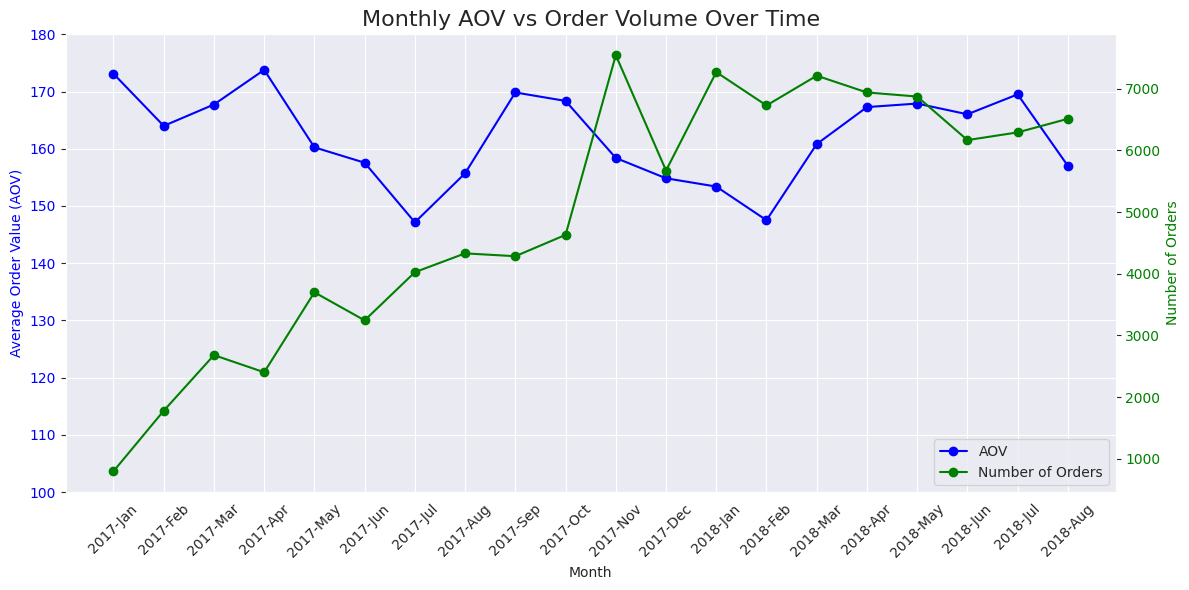

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets and prepare the data
df = pd.read_csv('/content/olist/Olist dataset/updated_olist_orders.csv')
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_purchase_month'] = df['order_purchase_timestamp'].dt.to_period('M')

dfp = pd.read_csv('/content/olist/Olist dataset/olist_order_payments_dataset.csv')
dfp = dfp.groupby('order_id')['payment_value'].sum().reset_index()
merge = pd.merge(df, dfp, on='order_id')

monthly_revenue = merge.groupby('order_purchase_month').agg({
    'order_id': 'nunique',
    'payment_value': 'sum'
}).reset_index()

monthly_revenue['AOV'] = monthly_revenue['payment_value'] / monthly_revenue['order_id']
monthly_revenue['order_purchase_month'] = pd.to_datetime(monthly_revenue['order_purchase_month'].astype(str))

# Filter the data range
start_date = monthly_revenue['order_purchase_month'].min() + pd.DateOffset(months=4)
end_date = monthly_revenue['order_purchase_month'].max() - pd.DateOffset(months=2)
filtered_data = monthly_revenue[
    (monthly_revenue['order_purchase_month'] >= start_date) &
    (monthly_revenue['order_purchase_month'] <= end_date)
]

# Implementing the graph
sns.set_style("darkgrid")
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Month')
ax1.set_ylabel('Average Order Value (AOV)', color='b')
line1 = ax1.plot(
    filtered_data['order_purchase_month'].dt.strftime('%Y-%b'),
    filtered_data['AOV'], color='b', marker='o', label='AOV'
)
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_ylim([100, 180])

ax2 = ax1.twinx()
ax2.set_ylabel('Number of Orders', color='g')
line2 = ax2.plot(
    filtered_data['order_purchase_month'].dt.strftime('%Y-%b'),
    filtered_data['order_id'], color='g', marker='o', label='Number of Orders'
)
ax2.tick_params(axis='y', labelcolor='g')

ax2.grid(False)
ax1.grid(True)

ax1.set_xticks(filtered_data['order_purchase_month'].dt.strftime('%Y-%b'))
ax1.set_xticklabels(filtered_data['order_purchase_month'].dt.strftime('%Y-%b'), rotation=45)

lines = line1 + line2
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='lower right')

plt.title('Monthly AOV vs Order Volume Over Time', fontsize=16)
fig.tight_layout()

plt.show()


With the inception of Olist in February 2015, the data available from October 2016 to August 2018 shows a significant upward trend in monthly revenue. During the first year specifically, the revenue increased exponentially, reflecting a strong initial market adoption of this virtual store. However, the last few months of the provided dataset may suggest a plateau in revenue growth. To maintain its momentum, the company may need to re-assess its marketing and operational strategies, this also suggests that the company has to scale up the level of customer engagement and introduce various promotional activities to increase the customer repeat rate.

From early 2017 to mid-2018, while order volume increased significantly, the AOV remained relatively stable between 140 and 180 BRL. This suggests that more orders are being placed, but customers are not increasing their spending per order. A possible explanation is that Olist is attracting more price-sensitive consumers who place smaller or frequent orders, keeping the AOV stable. Peaks in AOV, like November 2017, may align with events like Black Friday, while dips, such as in February 2018, could reflect post-holiday spending lulls. Overall, the stability of AOV suggests Olist is catering to a broader market without raising individual transaction sizes.

## #2. How do the total orders and canceled orders fluctuate over time?


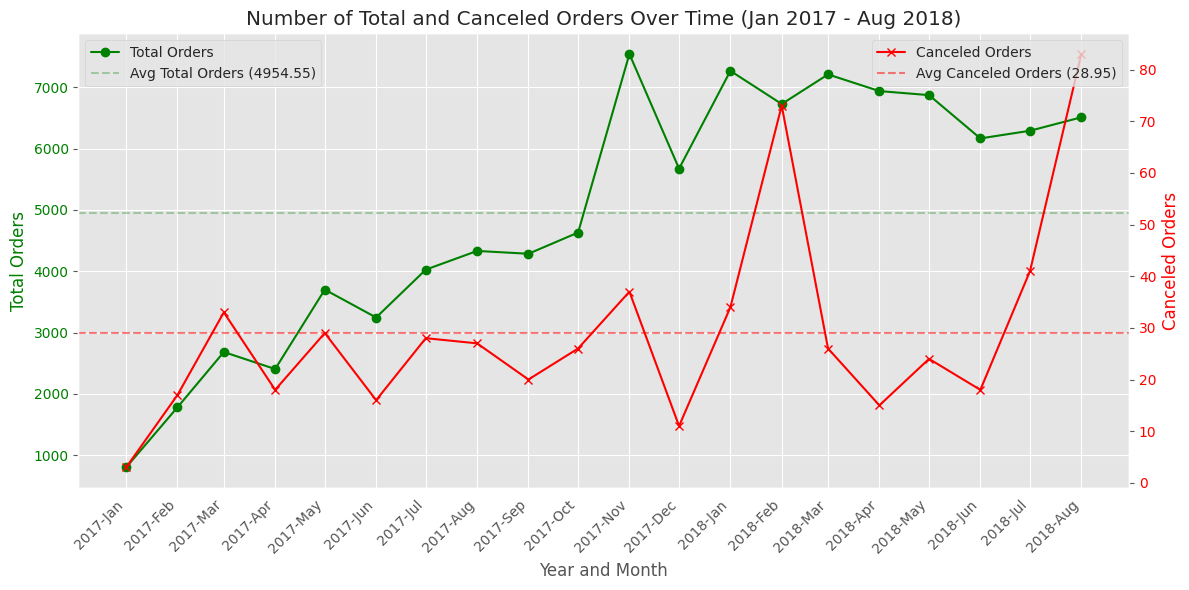

                    Metric     Value
0             Total Orders  99091.00
1          Canceled Orders    579.00
2     Average Total Orders   4954.55
3  Average Canceled Orders     28.95


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('ggplot')

# Prepaing the data
df = pd.read_csv('olist/Olist dataset/olist_orders_dataset.csv')

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

df['year_month'] = df['order_purchase_timestamp'].dt.to_period('M')

df_filtered = df[(df['order_purchase_timestamp'] >= '2017-01-01') & (df['order_purchase_timestamp'] <= '2018-08-31')]

total_orders_by_month = df_filtered.groupby('year_month')['order_id'].count().reset_index()
canceled_orders_by_month = df_filtered[df_filtered['order_status'] == 'canceled'].groupby('year_month')['order_id'].count().reset_index()
avg_total_orders = total_orders_by_month['order_id'].mean()
avg_canceled_orders = canceled_orders_by_month['order_id'].mean()
total_orders_by_month['year_month'] = total_orders_by_month['year_month'].dt.to_timestamp()
canceled_orders_by_month['year_month'] = canceled_orders_by_month['year_month'].dt.to_timestamp()


# Plotting the graph

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(total_orders_by_month['year_month'], total_orders_by_month['order_id'],
         label='Total Orders', marker='o', color='green')

ax1.axhline(y=avg_total_orders, color='green', linestyle='--', alpha=0.3, label=f'Avg Total Orders ({avg_total_orders:.2f})')

ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
plt.xticks(rotation=45, ha='right')

ax1.set_xlabel('Year and Month')
ax1.set_ylabel('Total Orders', color='green')
ax1.tick_params(axis='y', labelcolor='green')

ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(canceled_orders_by_month['year_month'], canceled_orders_by_month['order_id'],
         label='Canceled Orders', marker='x', color='red')

ax2.axhline(y=avg_canceled_orders, color='red', linestyle='--', alpha=0.5, label=f'Avg Canceled Orders ({avg_canceled_orders:.2f})')

ax2.set_ylabel('Canceled Orders', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax2.grid(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Number of Total and Canceled Orders Over Time (Jan 2017 - Aug 2018)')
fig.tight_layout()

plt.show()

summary_df = pd.DataFrame({
    'Metric': ['Total Orders', 'Canceled Orders', 'Average Total Orders', 'Average Canceled Orders'],
    'Value': [
        total_orders_by_month['order_id'].sum(),
        canceled_orders_by_month['order_id'].sum(),
        avg_total_orders,
        avg_canceled_orders
    ]
})

print(summary_df)


 The chart illustrates the number of total and canceled orders from January 2017 to August 2018. Total orders show a steady upward trend, peaking around mid-2018, with notable growth starting in late 2017. Despite occasional fluctuations, the overall number of orders remains consistently high throughout the period. In contrast, canceled orders remain much lower, with an average of 28.95 compared to 4954.55 for total orders. While there are a few sharp spikes in cancellations, notably in early 2017, late 2017, and mid-2018, the overall cancellation rate is relatively stable, indicating well-managed operations. The sharp rise in cancellations during these times might suggest operational or external factors that require further exploration. Overall, the chart highlights strong growth in total orders with minimal cancellations.

## #3. What are the Differences Between Product Categories Driven by the Most Order Volume and Revenue?

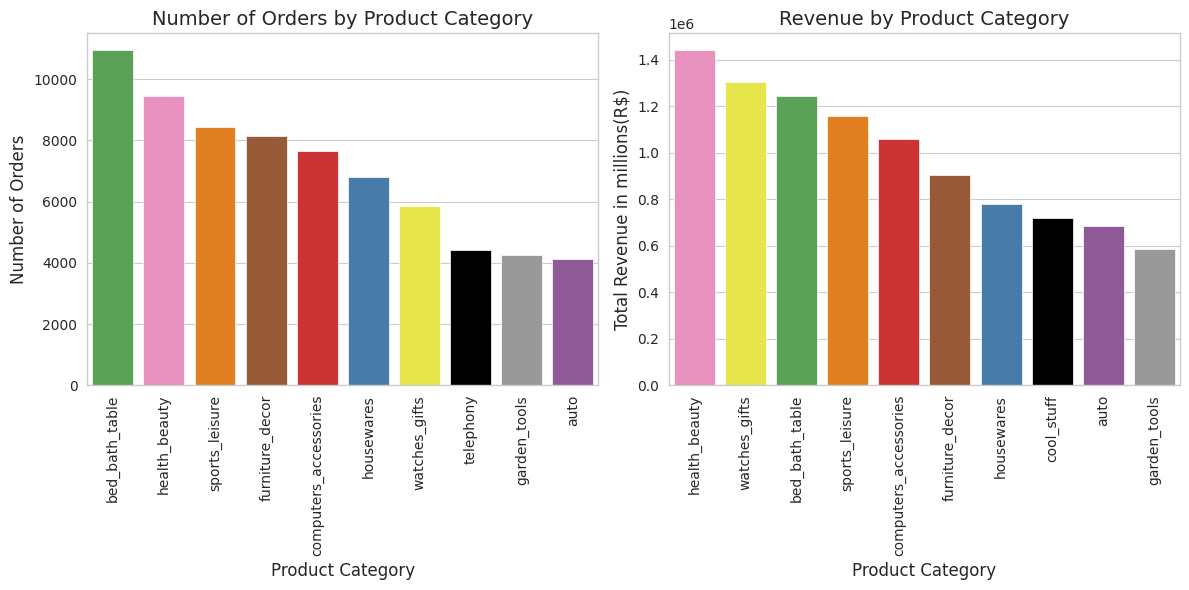

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

olist_order_items = pd.read_csv('olist/Olist dataset/updated_olist_order_items.csv')
olist_orders = pd.read_csv('olist/Olist dataset/updated_olist_orders.csv')
olist_products = pd.read_csv('olist/Olist dataset/updated_olist_products.csv')

olist_orders_merged = olist_order_items.merge(olist_orders,on='order_id')
olist_orders_merged = olist_orders_merged.dropna()

top_products = olist_orders_merged['product_id'].value_counts().reset_index()

top_products.columns = ['product_id', 'order_count']

top_products = top_products.merge(olist_products, on='product_id')\
                .sort_values('order_count', ascending=False)
top_products = top_products.groupby(('product_category_name_english'))['order_count'].sum().reset_index().sort_values('order_count', ascending=False).iloc[0:10]

products = pd.read_csv('olist/Olist dataset/updated_olist_products.csv')

olist_products = olist_order_items.merge(products[['product_category_name_english', 'product_id']], on='product_id', how='left')
olist_products['total_revenue'] = olist_products['price'] + olist_products['freight_value']

category_revenue = olist_products.groupby(('product_category_name_english'))['total_revenue'].sum().reset_index().sort_values(by='total_revenue', ascending=False)
top_categories = category_revenue.iloc[0:10]


common_categories = set(top_products['product_category_name_english']).intersection(top_categories['product_category_name_english'])

common_palette = sns.color_palette("Set1", len(common_categories))
color_mapping = dict(zip(common_categories, common_palette))

colors1 = [color_mapping[category] if category in common_categories else 'black' for category in top_products['product_category_name_english']]
colors2 = [color_mapping[category] if category in common_categories else 'black' for category in top_categories['product_category_name_english']]

sns.barplot(x='product_category_name_english', y='order_count', data=top_products, ax = axes[0],palette=colors1,hue='product_category_name_english',legend=False)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('Number of Orders by Product Category', fontsize=14)
axes[0].set_xlabel('Product Category', fontsize=12)
axes[0].set_ylabel('Number of Orders', fontsize=12)

sns.barplot(x='product_category_name_english', y='total_revenue', data=top_categories, ax = axes[1],palette=colors2,hue='product_category_name_english',legend=False)
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_title('Revenue by Product Category', fontsize=14)
axes[1].set_xlabel('Product Category', fontsize=12)
axes[1].set_ylabel('Total Revenue in millions(R$)', fontsize=12)

plt.tight_layout()
plt.show();

When comparing the number of orders per product category and the revenue per product category, they differ for the top 20 categories represented in the graphs above. The health and beauty category has the highest total revenue and ranks second in order volume, whereas the bed, bath and table is the highest sold by volume and ranks third in revenue.

The health and beauty category and the watches and gifts category may contain a range of products which may include premium brands(corresponding to higher prices) that can quickly drive up revenue, so a few purchases of premium products can lead to a high revenue. Whereas, the Bed bath and table category comprises of daily essential goods which have a purchase frequency higher than that of other products but the price range of these products being lower than health and beauty products/watches and gifts couldnt drive the revenue enough to be the highest revenue generating category.

This type of Volume vs Revenue analysis is important for pricing strategy decisions. Olist will be able to utilize this visualisation to identify the right categories to implement competitive pricing measures and to strategically introduce discounts.



## #4. How does order volume vary across the year for top product categories?

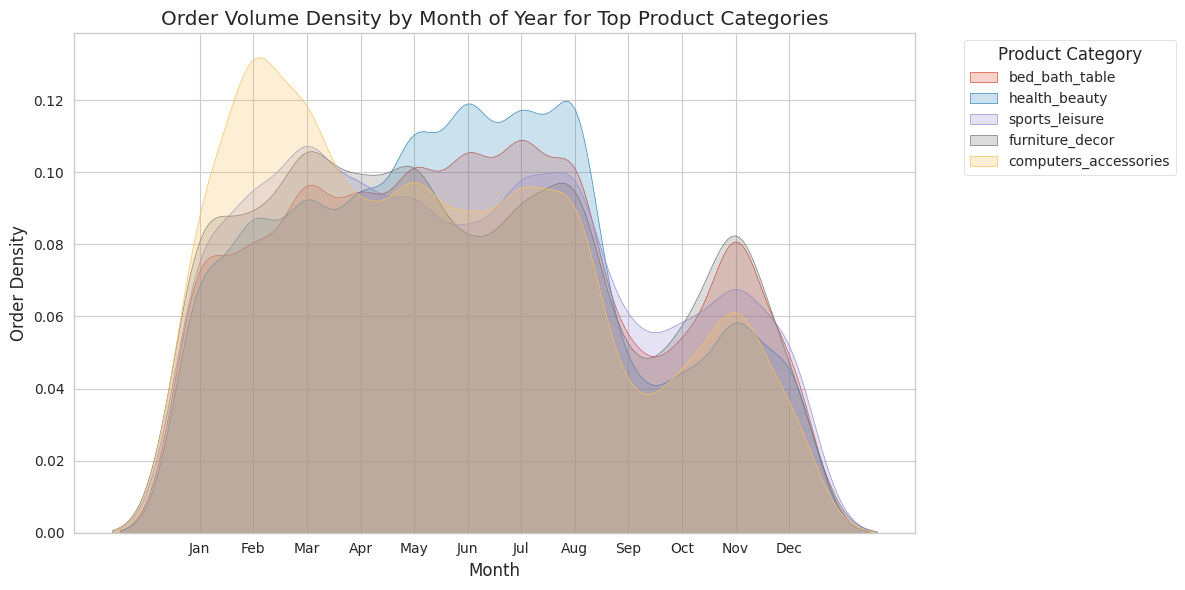

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

orders_df = pd.read_csv('olist/Olist dataset/olist_orders_dataset.csv', usecols=['order_id', 'order_purchase_timestamp'])
order_items_df = pd.read_csv('olist/Olist dataset/olist_order_items_dataset.csv', usecols=['order_id', 'product_id'])
products_df = pd.read_csv('olist/Olist dataset/updated_olist_products.csv', usecols=['product_id', 'product_category_name_english'])

orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

orders_df['order_month'] = orders_df['order_purchase_timestamp'].dt.month
orders_df['order_year'] = orders_df['order_purchase_timestamp'].dt.year

merged_df = pd.merge(order_items_df, orders_df, on='order_id')
merged_df = pd.merge(merged_df, products_df, on='product_id')

# Filter to top categories
top_categories = merged_df['product_category_name_english'].value_counts().nlargest(5).index
filtered_df = merged_df[merged_df['product_category_name_english'].isin(top_categories)]

plt.figure(figsize=(12, 6))
for category in top_categories:
    sns.kdeplot(data=filtered_df[filtered_df['product_category_name_english'] == category],
                x='order_month', label=category, fill=True)

plt.title('Order Volume Density by Month of Year for Top Product Categories')
plt.xlabel('Month')
plt.ylabel('Order Density')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()




The density plot of order volumes by month for key product catgeories highlights seasonal trends. It is notable that demand peaks between Januaru and July, especially in categories like bed_bath_table and furnitute_decor, indicating a strong market during the first half of the year. A dip in August suggests a seasonal slowdown, while a noticeable spike from October to November, particulary in computers_accessories and sports_leisure, aligns with holiday and promotional periods. Recommendations - by aligning stock levels with demand peaks, the company can reduce storage costs andavoid stockouts.  

## #5. How do product characteristics, delivery time, and price influence customer review scores?

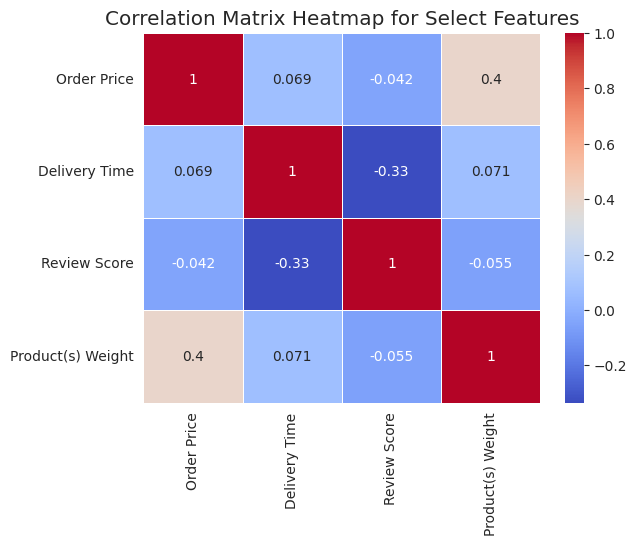

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

olist_products = pd.read_csv('olist/Olist dataset/updated_olist_products.csv')
olist_order_items = pd.read_csv('olist/Olist dataset/updated_olist_order_items.csv')
olist_orders = pd.read_csv('olist/Olist dataset/updated_olist_orders.csv')
olist_order_reviews = pd.read_csv('olist/Olist dataset/updated_olist_order_reviews.csv')

olist_order_items = olist_order_items.merge(olist_products[["product_id", "product_weight_g"]], on="product_id", how="left")

unique_orders = olist_order_items.groupby('order_id')[["price","freight_value", "product_weight_g"]].sum()

olist_orders["order_delivered_customer_date"] = pd.to_datetime(olist_orders["order_delivered_customer_date"])
olist_orders["order_purchase_timestamp"] = pd.to_datetime(olist_orders["order_purchase_timestamp"])

olist_orders["delivery_time"] = olist_orders["order_delivered_customer_date"] - olist_orders["order_purchase_timestamp"]

unique_orders = unique_orders.merge(olist_orders[["order_id", "delivery_time"]], on="order_id", how="left")
unique_orders = unique_orders.dropna()

unique_orders = unique_orders.merge(olist_order_reviews[["order_id", "review_score"]], on="order_id", how="left")
unique_orders = unique_orders.dropna()

unique_orders["total price"] = unique_orders["price"] + unique_orders["freight_value"]
unique_orders['product_weight_g'] = unique_orders['product_weight_g'] / 1000
unique_orders['delivery_time'] = unique_orders['delivery_time'].dt.days

interested_features = unique_orders[["total price", "delivery_time", "review_score", "product_weight_g"]]
heat_map = interested_features.corr()
heat_map.columns = ['Order Price', 'Delivery Time', 'Review Score', 'Product(s) Weight']
heat_map.index = ['Order Price', 'Delivery Time', 'Review Score', 'Product(s) Weight']
sns.heatmap(heat_map, annot=True, cmap='coolwarm', linewidths=0.5)


plt.title('Correlation Matrix Heatmap for Select Features')
plt.show()

The factors that most strongly correlate to each other are product weights, order price, delivery time and the order review score. This heatmap shows insights into how price and delivery times are able to influence customer satisfaction.

**Weight v Order Price**
There is a positive correlation between weight and order price, a relationship that is often overlooked. The correlation may be due to the material costs, as heavier items require more raw mateials. Additionally, heavier products incur higher shipping and handling costs as these costs are generally factored in while pricing products. By understanding this relationship, competitive prices can be set to accurately reflect the expenses associated to the items.


**Delivery Time v the Review Score**
There is a negative correlation between delivery time and review which is no suprise as customers may be less satisfied when experienced with long delivery times leading to lower reviews left and faster delivery results in greater customer satisfaction.




## #6. How does the price elasticity of demand fluctuate for heavier products on a weekly basis, and what do these changes indicate about consumer sensitivity to price variations?

<ipython-input-15-6b767be9a271>:34: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekly_elasticity_filled = weekly_elasticity.fillna(method='ffill')


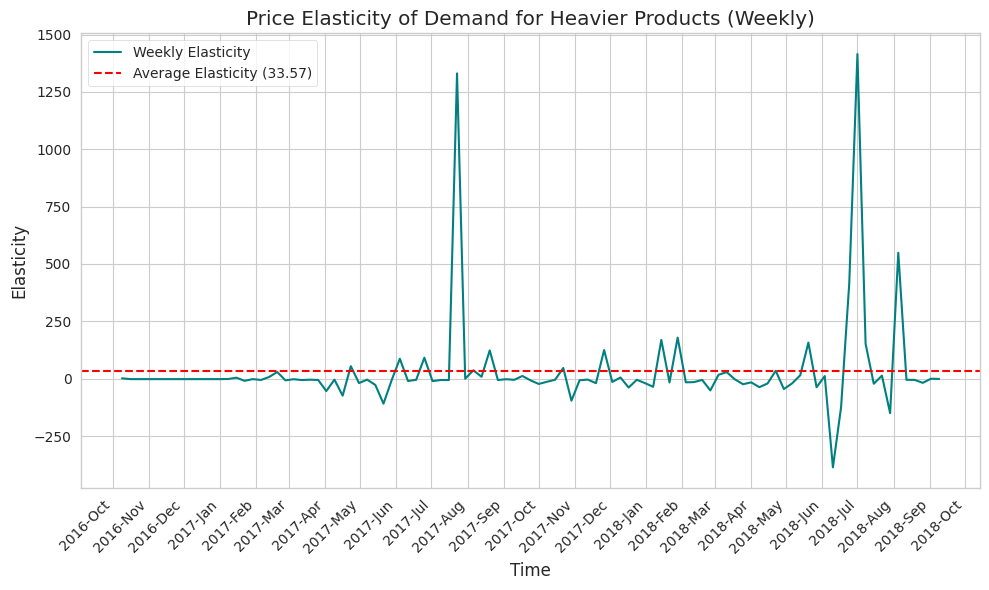

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the datasets
order_items_df = pd.read_csv('olist/Olist dataset/olist_order_items_dataset.csv', usecols=['order_id', 'product_id', 'price', 'order_item_id'])
products_df = pd.read_csv('olist/Olist dataset/olist_products_dataset.csv', usecols=['product_id', 'product_weight_g'])
orders_df = pd.read_csv('olist/Olist dataset/olist_orders_dataset.csv', usecols=['order_id', 'order_purchase_timestamp'])

# Merge datasets
merged_df = pd.merge(order_items_df, products_df, on='product_id', how='inner')
merged_df = pd.merge(merged_df, orders_df, on='order_id', how='inner')

# Filter for heavy products
merged_df['weight_class'] = merged_df['product_weight_g'].apply(lambda x: 'Heavy' if x >= 2000 else 'Other')
heavy_products_df = merged_df[merged_df['weight_class'] == 'Heavy'].copy()

# Calculate percentage changes
heavy_products_df = heavy_products_df.sort_values(by='order_purchase_timestamp')
heavy_products_df['price_change'] = heavy_products_df['price'].pct_change()
heavy_products_df['sales_change'] = heavy_products_df.groupby('product_id')['order_item_id'].transform('count').pct_change()
heavy_products_df['elasticity'] = heavy_products_df['sales_change'] / heavy_products_df['price_change']
heavy_products_df.replace([np.inf, -np.inf], np.nan, inplace=True)
heavy_products_df.dropna(subset=['elasticity'], inplace=True)

# Resample by week and filter from 2016-10 onwards
heavy_products_df['order_purchase_timestamp'] = pd.to_datetime(heavy_products_df['order_purchase_timestamp'])
heavy_products_df.set_index('order_purchase_timestamp', inplace=True)
weekly_elasticity = heavy_products_df['elasticity'].resample('W').mean()
weekly_elasticity = weekly_elasticity[weekly_elasticity.index >= '2016-10-01']  # Filter out dates before 2016-10

# Forward fill missing weekly values to remove gaps
weekly_elasticity_filled = weekly_elasticity.fillna(method='ffill')
avg_elasticity_heavy = weekly_elasticity_filled.mean()

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(weekly_elasticity_filled.index, weekly_elasticity_filled, label='Weekly Elasticity', color='teal')
plt.axhline(y=avg_elasticity_heavy, color='r', linestyle='--', label=f'Average Elasticity ({avg_elasticity_heavy:.2f})')

# Formatting the x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
plt.gcf().autofmt_xdate(rotation=45)

plt.title('Price Elasticity of Demand for Heavier Products (Weekly)')
plt.xlabel('Time')
plt.ylabel('Elasticity')
plt.legend()
plt.tight_layout()
plt.show()


The plot shows weekly price elasticity for heavier products, with significant spikes in certain weeks, particularly in mid 2017 and 2018.This suggests that demand for these products can be highly sensitive to price changes at specific times. The red line represents the average elasticity, indicating that while the average consumer sensitivity is relatively low, there are occasional periods where elasticity drastically increases.The extreme peaks indicate times when consumer demand was highly responsive to price changes, potentially due to promotional events, economic factors, or seasonality.Outside of these peaks, elasticity hovers around the average line, suggesting consistent consumer demand regardless of price changes.

## #7. How has the delivery timeline evolved as the company has grown and matured?

<ipython-input-16-65493b4ccf43>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olist_orders['delivery_bin'] = pd.cut(olist_orders['delivery_difference'], bins=bins, labels=labels)


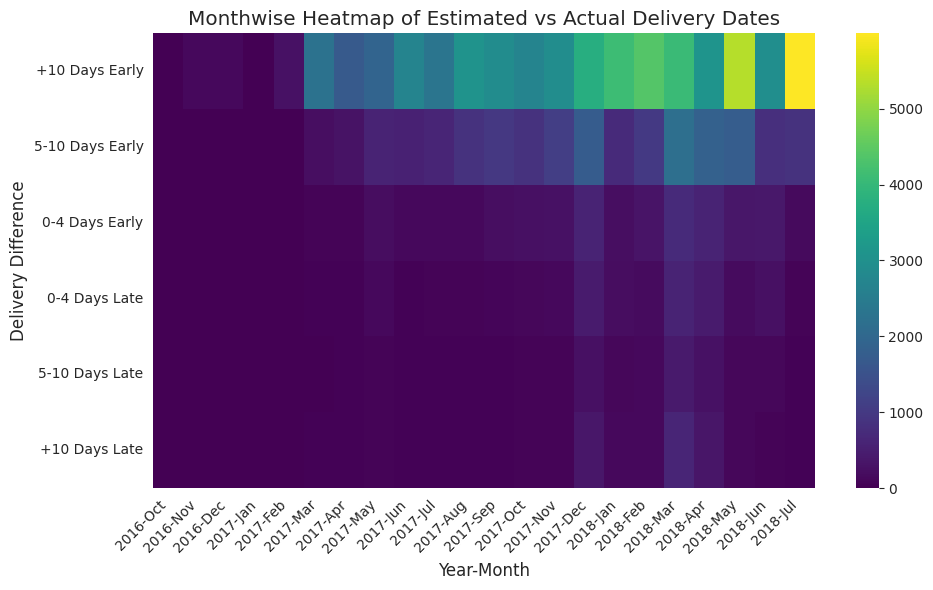

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

olist_orders = pd.read_csv('olist/Olist dataset/updated_olist_orders.csv')

olist_orders['order_estimated_delivery_date'] = pd.to_datetime(olist_orders['order_estimated_delivery_date'])
olist_orders['order_delivered_customer_date'] = pd.to_datetime(olist_orders['order_delivered_customer_date'])

olist_orders['delivery_difference'] = (olist_orders['order_delivered_customer_date'] - olist_orders['order_estimated_delivery_date']).dt.days

start_date = '2016-10-01'
end_date = '2018-07-31'

olist_orders = olist_orders[(olist_orders['order_estimated_delivery_date'] >= start_date) & (olist_orders['order_estimated_delivery_date'] <= end_date)]

bins = [-np.inf, -10, -5, -1, 4, 9, np.inf]
labels = ['+10 Days Early', '5-10 Days Early', '0-4 Days Early', '0-4 Days Late', '5-10 Days Late', '+10 Days Late']
olist_orders['delivery_bin'] = pd.cut(olist_orders['delivery_difference'], bins=bins, labels=labels)

heatmap_data = pd.crosstab(olist_orders['delivery_bin'], olist_orders['order_estimated_delivery_date'].dt.to_period('M'))

plt.figure(figsize=(10, 6))
ax = sns.heatmap(heatmap_data, cmap='viridis')

ax.set_xticklabels([f"{p.year}-{p.strftime('%b')}" for p in heatmap_data.columns], rotation=45, ha='right')

plt.title('Monthwise Heatmap of Estimated vs Actual Delivery Dates')
plt.xlabel('Year-Month')
plt.ylabel('Delivery Difference')
plt.tight_layout()
plt.show();


From October 2016 to July 2018, as the company matured, it greatly improved its ability to deliver packages earlier than expected. The majority of orders are arriving 10 or more days ahead of estimated schedule given to the customer. However, there has been a slight increase in late deliveries in the second half of the timeline which may warrant some investigations to determine where and why these delays are occuring. Eventhough, consistently delivering ahead of schedule is prefered to late deliveries, the methods to calculate the delivery trends appear to be overly optimistic and may need to be reassessed for better accuracy. For instance, if the initial delivery dates are set too far in the future, customers may decide to not place to order. A more accurate delivery estimate will enhance customer satisfaction and may increase customer orders with results in a positive customer perception.


## #8. How much revenue is flowing through each payment type?

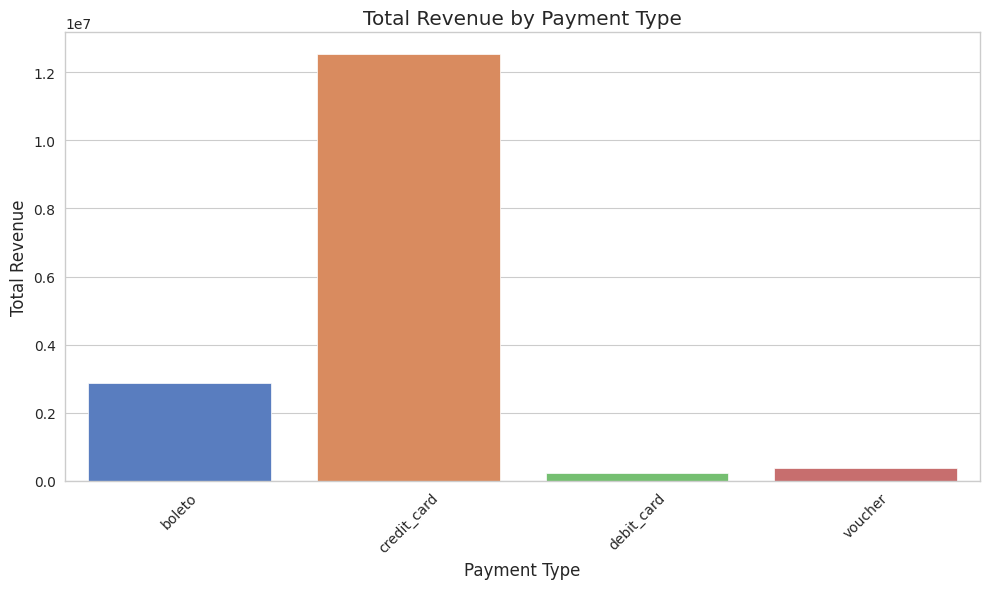

In [17]:
olist_order_payments = pd.read_csv('olist/Olist dataset/olist_order_payments_dataset.csv')
olist_orders = pd.read_csv('olist/Olist dataset/olist_orders_dataset.csv')

order_payments = pd.merge(olist_order_payments, olist_orders[['order_id', 'order_status']], on='order_id')

order_payments_filtered = order_payments[(order_payments['payment_type'] != 'not_defined') & (order_payments['payment_installments'] != 0)]
revenue_per_payment_type = order_payments_filtered.groupby('payment_type')['payment_value'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='payment_type', y='payment_value', data=revenue_per_payment_type, palette='muted',hue='payment_type')
plt.title('Total Revenue by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph depicts the total revenue generated by different payment types, revealing that credit cards are the dominant method, contributing around 10 million R$. This highlights that most customers prefer credit cards for their purchases, making it crucial to ensure a smooth payment experience for these users. "Boleto" is the second most popular payment method, contributing less than credit cards but still holding a significant share. This payment option is important for customers who do not use credit cards. On the other hand, debit card and voucher payments contribute minimally to the total revenue, suggesting they are mainly used for smaller transactions or promotional purposes.

To capitalize on these insights, promoting installment plans for credit card users could help increase average order values and encourage larger purchases. Streamlining the "boleto" payment process can enhance customer satisfaction, potentially increasing its usage. Offering small incentives, such as discounts, for using "boleto" might further boost its popularity. Additionally, increasing the attractiveness of voucher usage through loyalty programs or seasonal promotions could expand their adoption. Lastly, ensuring a seamless checkout experience for credit card and "boleto" users is critical, given their significant impact on total revenue.



## #9. What are the payment preferences across different states?

In [18]:
olist_order_payments = pd.read_csv('olist/Olist dataset/olist_order_payments_dataset.csv')
olist_customers = pd.read_csv('olist/Olist dataset/olist_customers_dataset.csv')

order_payments = olist_orders_merged.merge(olist_order_payments, on='order_id')
order_payments = order_payments.merge(olist_customers, on='customer_id')

payment_preferences = order_payments.groupby(['customer_state', 'payment_type'])['payment_value'].mean().reset_index()

import plotly.express as px
fig = px.bar(payment_preferences, x='customer_state', y='payment_value', color='payment_type',
             title='Average Payment Value per Payment Type and Region',
             barmode='group')
fig.update_layout(xaxis_title='Region (State)', yaxis_title='Average Payment Value')
fig.show()

From the above bar plot it is evident that credit card payments consistently show the highest average transaction values across most regions, with notable spikes in Tocantins (TO) and Paraiba (PB). This suggests that customers in these regions are comfortable making high-value purchases using credit cards.
Olist can capitalize on this by offering installment plans, exclusive deals, and strategic partnerships with banks that issue the most popular credit cards in these regions.

Regions like Acre (AC) and Amazonas (AM) demonstrate a preference for boleto payments, with higher average transaction values compared to most other states. Boleto is a payment method used in Brazil that allows customers to pay for goods and services using payment vouchers. Boleto is regulated by the Central Bank of Brazil and is a popular payment method for online purchases This indicates that these customers value the security of boleto or may represent an unbanked population. Olist can enhance their experience by streamlining the fulfillment process for boleto transactions and offering incentives to shift towards faster payment methods like credit or debit cards.

Debit card payments are particularly high in regions such as Sergipe (SE) and Paraiba (PB), suggesting that the consumer base in these areas, possibly comprising younger generations, prefers this method. It has emerged as the third most used payment option.

On the other hand, regions like São Paulo (SP) and Rio de Janeiro (RJ) show more balanced payment preferences, with smaller and more frequent purchases indicating a price-sensitive customer base. Olist can implement loyalty programs or subscription services in these populous regions to enhance customer retention and encourage repeat purchases. Lastly, voucher payments have the lowest average transaction values across all regions, indicating that they are primarily used for smaller, discount-driven purchases. Olist can further promote voucher usage through targeted campaigns in regions with lower sales, potentially increasing transaction volume for low-margin or clearance products.

## #10. What is the average approval time for different payment types?

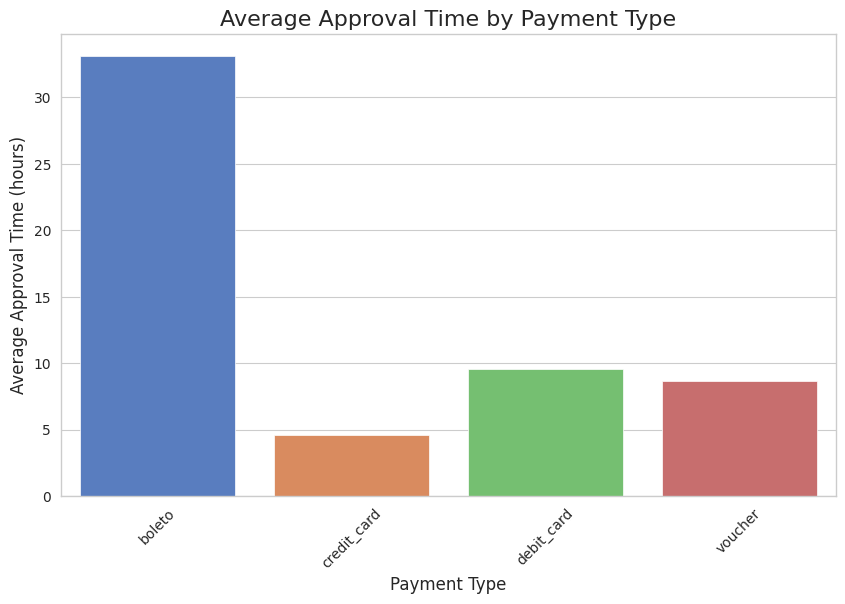

In [19]:
olist_order_payments = pd.read_csv('olist/Olist dataset/olist_order_payments_dataset.csv')
olist_orders = pd.read_csv('olist/Olist dataset/olist_orders_dataset.csv')

olist_orders['order_approved_at'] = pd.to_datetime(olist_orders['order_approved_at'])
olist_orders['order_purchase_timestamp'] = pd.to_datetime(olist_orders['order_purchase_timestamp'])

olist_orders['approval_time'] = (olist_orders['order_approved_at'] - olist_orders['order_purchase_timestamp']).dt.total_seconds() / 3600

order_payments = olist_orders.merge(olist_order_payments, on='order_id')
olist_order_payments_filtered = olist_order_payments[
    (olist_order_payments['payment_type'] != 'not_defined') &
    (olist_order_payments['payment_installments'] != 0)
]

order_payments = olist_orders.merge(olist_order_payments_filtered, on='order_id')

avg_approval_time = order_payments.groupby('payment_type')['approval_time'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='payment_type', y='approval_time', data=avg_approval_time, palette='muted',hue='payment_type')
plt.title('Average Approval Time by Payment Type', fontsize=16)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Average Approval Time (hours)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

The graph shows the average approval time for different payment types, highlighting a significant delay for "boleto" payments compared to credit card, debit card, and voucher. "Boleto" payments take over 30 hours to be approved, while other payment methods take less than five hours on average.

Quick approval times are essential in e-commerce for improving customer experience and operational efficiency. Faster approvals allow quicker packaging and shipping, meeting customer expectations for prompt service. The high approval time for "boleto" payments can lead to delayed shipments, impacting customer satisfaction and reducing the likelihood of repeat purchases.

To address this, Olist could consider automating "boleto" payment confirmations through partnerships with banks or incentivizing customers to use faster payment methods like credit or debit cards. Offering promotions such as discounts or cashback for these payment types could encourage quicker approvals, streamline order processing, and improve the overall shopping experience. This would help Olist maintain a competitive edge in the fast-paced e-commerce industry by optimizing their supply chain and reducing bottlenecks.

## #11. What are the preferred payment methods when separated by new and returning customers?

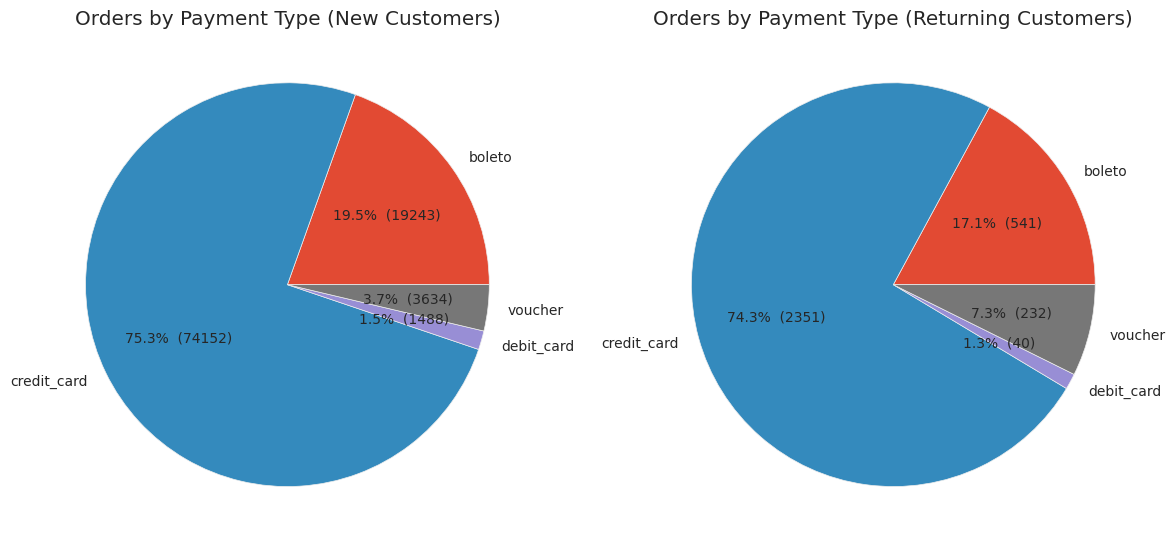

In [20]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd

olist_order_payments = pd.read_csv('olist/Olist dataset/olist_order_payments_dataset.csv')
olist_orders = pd.read_csv('olist/Olist dataset/updated_olist_orders.csv')
olist_customers = pd.read_csv('olist/Olist dataset/olist_customers_dataset.csv')

olist_order_payments_amount = olist_order_payments[(olist_order_payments['payment_type'] != 'not_defined' ) &
                                                  (olist_order_payments['payment_installments'] != 0 )]

olist_order_payments_amount = olist_order_payments_amount.groupby(['order_id','payment_type'])['payment_value'].sum().reset_index()
orders_pmt = olist_order_payments_amount.merge(olist_orders, on='order_id', how='left')
orders_pmt_customers = orders_pmt.merge(olist_customers, on='customer_id', how='left')

orders_pmt_customers['order_purchase_timestamp'] = pd.to_datetime(orders_pmt_customers['order_purchase_timestamp'])

first_purchase_dates = orders_pmt_customers.groupby('customer_unique_id')['order_purchase_timestamp'].min()

orders_pmt_customers = orders_pmt_customers.merge(first_purchase_dates, on='customer_unique_id', how='left', suffixes=('', '_first'))

orders_pmt_customers['is_first_purchase'] = (orders_pmt_customers['order_purchase_timestamp'] == orders_pmt_customers['order_purchase_timestamp_first']).astype(int)

group_by_pmt= orders_pmt_customers.groupby(['is_first_purchase','payment_type'])['payment_value'].sum().reset_index()

payment_usage_per_order = orders_pmt_customers.groupby(['is_first_purchase', 'payment_type'])['order_id'].count().reset_index()
customer_type_payment_groups = group_by_pmt.merge(payment_usage_per_order , on = ['is_first_purchase','payment_type'])

def make_autopct(values):
  def my_autopct(pct):
    total = sum(values)
    val = int(round(pct*total/100.0))
    return '{p:.1f}%  ({v:d})'.format(p=pct,v=val)
  return my_autopct

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

new_customers = customer_type_payment_groups[customer_type_payment_groups['is_first_purchase'] == 1]
axes[0].pie(new_customers['order_id'], labels=new_customers['payment_type'], autopct=make_autopct(new_customers['order_id']))
axes[0].set_title('Orders by Payment Type (New Customers)')

returning_customers = customer_type_payment_groups[customer_type_payment_groups['is_first_purchase'] == 0]
axes[1].pie(returning_customers['order_id'], labels=returning_customers['payment_type'], autopct=make_autopct(returning_customers['order_id']))
axes[1].set_title('Orders by Payment Type (Returning Customers)')


plt.tight_layout()
plt.show()


The pie chart shows the distribution of payment methods used by new and returning customers. It is no surprise that credit card and boleto are the preferred payment methods as they are both used as both function similarly in terms of usage and convenience, essentially offering comparable experiences for customers. An intriguing trend seen is between the voucher usages. The lower percentage but higher count of new customers using vouchers compared to higher percentage but lower count of returning customers may be indicative of how vouchers are used and perceived. To ensure accurate insights, we excluded records where the payment type was undefined, as they lacked meaningful information, and where the installment count was zero, as making zero payments is not feasible- at least one payment should be made. Given that this finding was unexpected, we will delve deeper into the topic in the next two graphs. Understanding the distinct dynamics of voucher usage could provide Olist with valuable insights into leveraging vouchers as an effective customer acquisition tool through targeted marketing, while also potentially enhancing customer lifetime value.

## #12. How effective are vouchers as a marketing tactic in encouraging customers to make repeat purchases?

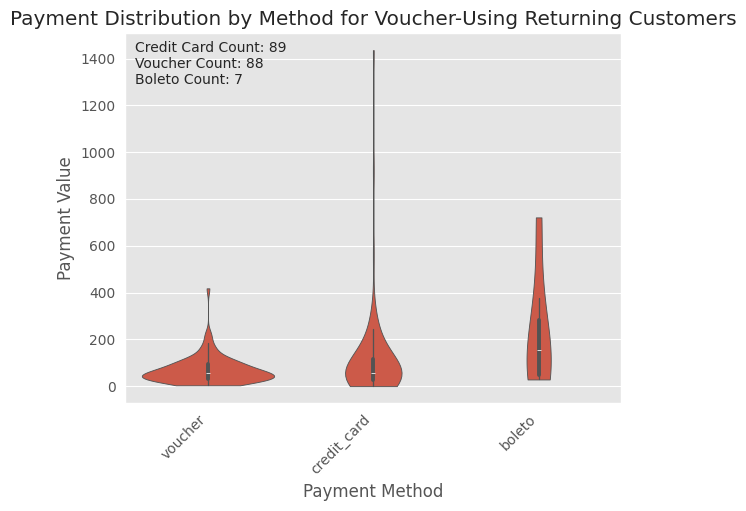

In [21]:

import seaborn as sns
import matplotlib.pyplot as plt


new_customers_voucher = orders_pmt_customers[(orders_pmt_customers['payment_type'] == 'voucher')  & (orders_pmt_customers['is_first_purchase'] == 1)]
new_customers_voucher_unique = new_customers_voucher[['customer_unique_id']].drop_duplicates()
returning_customers_data = orders_pmt_customers[orders_pmt_customers['is_first_purchase'] == 0]

returning_customers_and_first_time_voucher_users = returning_customers_data[returning_customers_data['customer_unique_id'].isin(new_customers_voucher_unique['customer_unique_id'])]

group_returning_customers_and_first_time_voucher_users = returning_customers_and_first_time_voucher_users.groupby('payment_type')['order_id']

sns.violinplot(x='payment_type', y='payment_value', data=returning_customers_and_first_time_voucher_users, cut = 0)
credit_card_count = returning_customers_and_first_time_voucher_users[returning_customers_and_first_time_voucher_users['payment_type'] == 'credit_card']['payment_type'].count()
voucher_count = returning_customers_and_first_time_voucher_users[returning_customers_and_first_time_voucher_users['payment_type'] == 'voucher']['payment_type'].count()
boleto_count = returning_customers_and_first_time_voucher_users[returning_customers_and_first_time_voucher_users['payment_type'] == 'boleto']['payment_type'].count()
plt.annotate(f'Credit Card Count: {credit_card_count}\nVoucher Count: {voucher_count}\nBoleto Count: {boleto_count}',
             xy=(0.02, 0.98), xycoords='axes fraction', ha='left', va='top')

plt.title('Payment Distribution by Method for Voucher-Using Returning Customers')
plt.xlabel('Payment Method')
plt.ylabel('Payment Value')
plt.xticks(rotation=45, ha='right')
plt.show()

This violin plot builds upon the previous graph, showing the distribution of payment values for returning customers who used vouchers for their first purchase broken down into the payment methods used for their subsequent purchase. The higher payment values with credit cards indicates that there is a potential for higher customer lifetime value for voucher users who transition to credit card payments. Additionally, returning customers using vouchers have lower payment values which can indicate that the customers are making smaller purchases or are using up their remaining voucher balance. Understanding the voucher usage amounts can help the business experiment with different voucher values and reemption rules to optimize their impact on customer behavior and sales. Olist can offer tiered vouchers with values based on purchase history to inventivize larger and continued purchases. By understanding the behavior of returning customers, Olist can personalize their communications to improve customer relationships and encourage loyalty.

## #13. How does the initial payment method (voucher vs. non-voucher) impact the average number of repeat purchases made by customers?

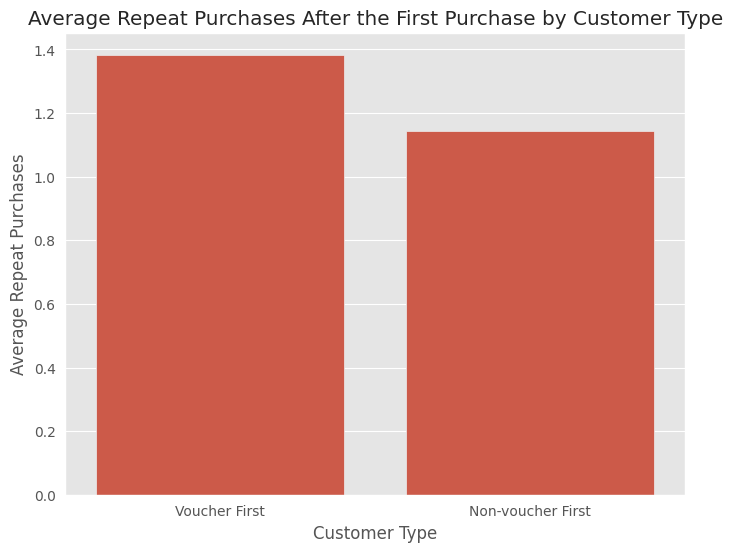

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

new_customers_voucher = orders_pmt_customers[(orders_pmt_customers['payment_type'] == 'voucher')  & (orders_pmt_customers['is_first_purchase'] == 1)]
new_customers_voucher_unique = new_customers_voucher[['customer_unique_id']].drop_duplicates()
returning_customers_data = orders_pmt_customers[orders_pmt_customers['is_first_purchase'] == 0]
returning_customers_and_first_time_voucher_users = returning_customers_data[returning_customers_data['customer_unique_id'].isin(new_customers_voucher_unique['customer_unique_id'])].reset_index(drop = True)

returning_customers_and_first_time_voucher_users['num_of_repeat_purchases'] = returning_customers_and_first_time_voucher_users.groupby('customer_unique_id')['order_id'].transform('count').sort_values()
test1_voucher_first = returning_customers_and_first_time_voucher_users.groupby('customer_unique_id')['num_of_repeat_purchases'].count()
test_nonvoucher = returning_customers_data[~returning_customers_data['customer_unique_id'].isin(new_customers_voucher_unique['customer_unique_id'])].reset_index(drop = True)
test_nonvoucher['num_of_repeat_purchases'] = test_nonvoucher.groupby('customer_unique_id')['order_id'].transform('count').sort_values()
test2_nonvoucher = test_nonvoucher.groupby('customer_unique_id')['num_of_repeat_purchases'].count()

import matplotlib.pyplot as plt
import seaborn as sns

avg_repeat_voucher = test1_voucher_first.mean()
avg_repeat_nonvoucher = test2_nonvoucher.mean()

data = pd.DataFrame({
    'Customer Type': ['Voucher First', 'Non-voucher First'],
    'Average Repeat Purchases': [avg_repeat_voucher, avg_repeat_nonvoucher]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Customer Type', y='Average Repeat Purchases', data=data)
plt.title('Average Repeat Purchases After the First Purchase by Customer Type')
plt.ylabel('Average Repeat Purchases')
plt.show()


 The bar graph uncovers that those using vouchers in their first purchase have a higher average number of repeat purchases than those that did not utilize vouchers in their first purchase. The graph suggests that using vouchers as a marketing tool for acquiring customers may be effective in driving customer retention and repeat businesses. This graph supports the continued usage of vouchers as a promotion to acquire new customers. This also reinforces the importance of acquiring customers through voucher promotions. Olist should utilize this insight to optimize their marketing strategies and loyalty programs to maximize customer retintion.

## #14. What is the Customer Life time Value across different states in Brazil?

In [35]:
import plotly.express as px
import json

olist_customers = pd.read_csv('olist/Olist dataset/olist_customers_dataset.csv')
olist_order_payments = pd.read_csv('olist/Olist dataset/olist_order_payments_dataset.csv')
olist_orders = pd.read_csv('olist/Olist dataset/olist_orders_dataset.csv')

customer_order_value = olist_orders.merge(olist_order_payments, on='order_id')
customer_order_value = customer_order_value.merge(olist_customers, on='customer_id')
customer_order_value = customer_order_value[['order_id','customer_id','customer_unique_id','payment_value','customer_state','order_purchase_timestamp',]]
avg_customer_value = customer_order_value.groupby(['customer_unique_id','customer_state'])['payment_value'].mean().reset_index()

avg_customer_value.head()

customer_purchase_frequency = customer_order_value.groupby('customer_unique_id')['order_id'].count().reset_index(name='purchase_frequency')

customer_purchase_frequency.sort_values(by='purchase_frequency', ascending=False).head(50)

customer_lifespan = customer_order_value.groupby('customer_unique_id').agg(first_purchase=('order_purchase_timestamp','min'),last_purchase=('order_purchase_timestamp','max')).reset_index()
customer_lifespan['first_purchase'] = pd.to_datetime(customer_lifespan['first_purchase'])
customer_lifespan['last_purchase'] = pd.to_datetime(customer_lifespan['last_purchase'])
customer_lifespan['customer_lifespan_days'] = (customer_lifespan['last_purchase'] - customer_lifespan['first_purchase']).dt.days

customer_lifespan.groupby('customer_lifespan_days').size()

# Calculating customer lifetime value of each customer
customer_value_frequency = avg_customer_value.merge(customer_purchase_frequency, on='customer_unique_id')
customer_lifetime_value = customer_lifespan.merge(customer_value_frequency, on='customer_unique_id')
customer_lifetime_value['CLV'] = customer_lifetime_value['payment_value'] * customer_lifetime_value['purchase_frequency'] * customer_lifetime_value['customer_lifespan_days']
customer_lifetime_value = customer_lifetime_value[['customer_unique_id','customer_state','payment_value','purchase_frequency','customer_lifespan_days','CLV']]
#customer_lifetime_value

customer_lifetime_value.groupby('CLV').size()

customer_lifetime_value.head()
customer_lifetime_value = customer_lifetime_value[customer_lifetime_value['CLV'] > 0]

customer_lifetime_value

state_clv = customer_lifetime_value.groupby('customer_state')['CLV'].mean().reset_index()

geojson_url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'

fig = px.choropleth(
    state_clv,
    geojson=geojson_url,
    locations='customer_state',
    featureidkey="properties.sigla",
    color='CLV',
    hover_name='customer_state',
    color_continuous_scale="Viridis",
    title="Average Customer Lifetime Value by across Brazil"
)

# Update map layout to focus on Brazil
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(
    width=1400,
    height=1000,
    title_font_size=20,
    margin={"r":0,"t":60,"l":5,"b":0})

fig.show()



The choropleth map visualizes the average Customer Lifetime Value (CLV) across different states in Brazil. CLV is a critical metric for understanding the long-term value that customers bring to the business, factoring in their average purchase value, purchase frequency, and overall lifespan as a customer. CLV provides insights into customer profitability over time, helping businesses prioritize efforts to retain high-value customers and maximize the return on marketing investments. The map uses a color gradient ranging from dark blue (low CLV) to yellow (high CLV), allowing us to easily identify which states have higher or lower average CLV.

States highlighted in yellow exhibit higher average CLV (AM,SE), indicating that customers in these regions are making higher-value purchases or purchasing more frequently. These high-CLV customers are more profitable and contribute significantly to overall revenue. Conversely, states in dark blue show lower average CLV (MS,AP), suggesting lower spending per order or less frequent purchases. For states with which are inclined towards a higher CLV (MA,TO,RO,PE) show the growth opportunities that the company has in pushing the customers through various customers centric marketing campaigns to drive higher value purchases in these states.

These variations are crucial for Olist in determining where to allocate resources and tailor strategies to enhance customer value and profitability. States with higher CLV represent a clear opportunity for customer retention programs, while states with lower CLV require more affordable or tailored offerings and improved logistics to boost satisfaction and purchase frequency. Additionally, analyzing payment preferences reveals that focusing on credit card installment options and boleto payments can enhance accessibility and increase customer lifetime value in both high- and low-CLV regions.

## #15. How are the sellers and customers of Olist distributed across Brazil?

In [24]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots

# Load and preprocess seller data
sellers = pd.read_csv('/content/olist/Olist dataset/olist_sellers_dataset.csv')
sellers_sum = sellers.groupby('seller_state').count().reset_index()
sellers_sum = sellers_sum.rename(columns={'seller_id': 'seller_count'})
sellers_sum = sellers_sum[['seller_state', 'seller_count']]

# Load and preprocess customer data
customers = pd.read_csv('/content/olist/Olist dataset/olist_customers_dataset.csv')
customers_sum = customers.groupby('customer_state').count().reset_index()
customers_sum = customers_sum.rename(columns={'customer_id': 'customer_count'})
customers_sum = customers_sum[['customer_state', 'customer_count']]

# Handle missing states in seller data by adding them with a count of 0
for state in set(customers_sum['customer_state']) - set(sellers_sum['seller_state']):
    sellers_sum = pd.concat([sellers_sum, pd.DataFrame({'seller_state': [state], 'seller_count': [0]})], ignore_index=True)

# GeoJSON for Brazil states
geojson_url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'

# Plotly choropleth for sellers
fig_sellers = px.choropleth(
    sellers_sum,
    geojson=geojson_url,
    locations='seller_state',
    featureidkey="properties.sigla",
    color='seller_count',
    hover_name='seller_state',
    color_continuous_scale="Viridis",
    title="Concentration of Sellers Across Brazil",
    labels={'seller_count': 'Number of Sellers'}
)

# Plotly choropleth for customers
fig_customers = px.choropleth(
    customers_sum,
    geojson=geojson_url,
    locations='customer_state',
    featureidkey="properties.sigla",
    color='customer_count',
    hover_name='customer_state',
    color_continuous_scale="Viridis",
    title="Concentration of Customers Across Brazil",
    labels={'customer_count': 'Number of Customers'}
)

# Create side-by-side subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Seller Concentration", "Customer Concentration"),
    specs=[[{"type": "choropleth"}, {"type": "choropleth"}]]
)

# Add traces to subplots
fig.add_trace(fig_sellers.data[0], row=1, col=1)
fig.add_trace(fig_customers.data[0], row=1, col=2)

# Adjust map boundaries
fig.update_geos(fitbounds="locations", visible=False)

# Update layout and color scales
fig.update_layout(
    title_text='Seller vs Customer Concentration Across Brazilian States',
    title_x=0.5,
    margin={"r":0, "t":50, "l":0, "b":0},

    coloraxis1=dict(colorscale='Viridis', colorbar=dict(
        title="Sellers",
        x=-0.05,
        y=0.5,
        orientation='v',
        xanchor='center',
        yanchor='middle'
    )),

    coloraxis2=dict(colorscale='Viridis', colorbar=dict(
        title="Customers",
        x=1.05,
        y=0.5,
        orientation='v',
        xanchor='center',
        yanchor='middle'
    ))
)

fig.data[0].coloraxis = 'coloraxis1'
fig.data[1].coloraxis = 'coloraxis2'
fig.show()


This visualization highlights the concentration of sellers and customers across Brazilian states from the Olist dataset, with a clear emphasis on São Paulo. The maps show that while seller concentration is spread across southern and southeastern regions, São Paulo stands out as the hub for both sellers and customers. Notably, São Paulo, being an economic powerhouse with a large population, offers high consumer demand, making it a strategic focal point for Olist. Interestingly, while Olist was founded in Paraná, the state adjacent to São Paulo, it has since moved its headquarters to São Paulo, further emphasizing the city’s significance to the company’s operations. This shift suggests a correlation between the platform’s market presence and the state’s economic activity. São Paulo's dominant role in Brazil’s commerce likely drives both high customer demand and seller participation on Olist’s platform, potentially explaining the platform's concentration of activity in this region. This strategic focus on São Paulo highlights the importance of the state for Olist's business model.

# V. Challenges
___

- **Insufficient Sample Size of Returning Customers**: A key challenge was assessing whether the sample size of returning customers was large enough to draw meaningful conclusions. With a smaller sample, trends might result from random variation rather than actual patterns, making it hard to generalize the results confidently. Addressing this requires careful consideration of statistical significance and possibly further data collection.

- **Limited Data Availability**: Although we had data spanning three years, the complete dataset was only available for one year, which restricted our ability to make robust conclusions. To overcome this, we focused on periods of overlap, such as comparing the last three months across consecutive years (2016–2017 and 2017–2018), to observe trends in sales and customer behavior.

- **Lack of Dataset Connectivity**: A major issue was the absence of a primary key to connect datasets, which hindered our analysis of customer retention and churn. We resolved this by shifting our focus to payment data to compare new and returning customers, rather than linking customer and order datasets.

- **Implementing Comparative Heatmaps**: Creating a heatmap of Brazilian states was challenging, especially when it came to designing two maps with separate scales on a single chart for comparison purposes. Balancing the visual representation across different scales added complexity to the task.


# VI. Conclusion
___

Our comprehensive analysis of Brazilian e-commerce data from Olist (2016-2018) provides actionable insights into customer segmentation, product performance, and sales patterns that can drive optimized business strategies:

**Customer Segmentation and Satisfaction:** Identifying distinct customer groups and their purchasing behaviors enables more effective targeted marketing. Additionally, implementing a more accurate delivery prediction model could improve customer satisfaction by reducing overly conservative delivery dates, thereby enhancing conversion rates and overall customer perception.

**Product and Sales Performance:** The analysis of product categories and seasonal sales patterns reveals clear opportunities for optimizing inventory management, product recommendations, and promotional strategies. Ensuring high-demand products are adequately stocked and promoted during peak periods will maximize sales and minimize storage costs in slower months.

**Price Elasticity and Payment Preferences**: Fluctuations in price sensitivity, especially for heavier products, suggest that flexible pricing strategies during periods of high elasticity could increase revenue. Additionally, insights into customer payment preferences can help tailor promotions and streamline the payment process, enhancing the user experience and potentially boosting conversion rates.

By leveraging these insights, Olist can improve operational efficiency, enhance customer satisfaction, and drive revenue growth. Continuous monitoring and data-driven adjustments will support sustained alignment with market dynamics and customer expectations.



# VII. Appendix
___

## What are the common issues customers face with canceled orders?

In [25]:
!pip install googletrans==3.1.0a0


<ipython-input-26-6d216fb7cdfc>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-6d216fb7cdfc>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



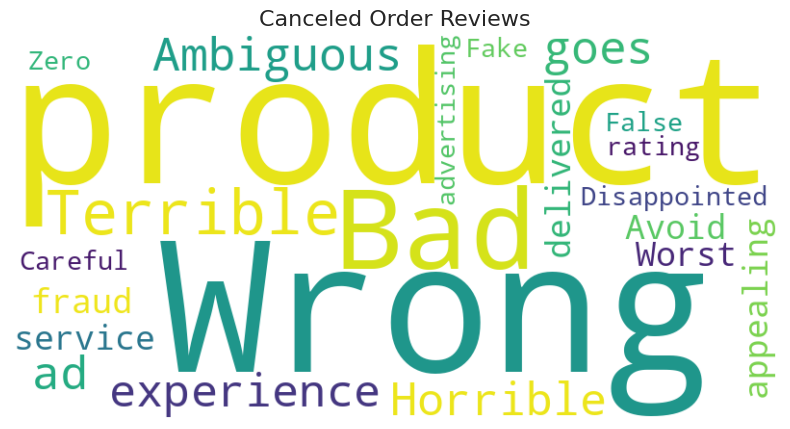

In [26]:
import pandas as pd
from googletrans import Translator
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob  # For sentiment analysis

# Load the datasets
df_orders = pd.read_csv('olist/Olist dataset/olist_orders_dataset.csv')
df_reviews = pd.read_csv('olist/Olist dataset/olist_order_reviews_dataset.csv')

# Merge the datasets on 'order_id'
merged_df = pd.merge(df_orders, df_reviews, on='order_id')

# Filter for canceled orders
canceled_orders = merged_df[merged_df['order_status'] == 'canceled']

# Initialize the translator
translator = Translator()

# Translate the review comments from Portuguese to English
canceled_orders['review_comment_title_en'] = canceled_orders['review_comment_title'].apply(
    lambda x: translator.translate(x, src='pt', dest='en').text if pd.notnull(x) else '')

# Apply sentiment analysis to detect negative comments
def detect_sentiment(text):
    if text:
        blob = TextBlob(text)
        return blob.sentiment.polarity
    return 0

# Add a sentiment score column
canceled_orders['sentiment_score'] = canceled_orders['review_comment_title_en'].apply(detect_sentiment)

# Filter for negative comments (sentiment score < 0)
negative_comments = canceled_orders[canceled_orders['sentiment_score'] < 0]

# Show negative reviews
# print("Negative reviews:")
# print(negative_comments[['review_comment_title', 'review_comment_title_en', 'sentiment_score']])

# Combine all negative reviews for word cloud
all_negative_reviews_en = ' '.join(negative_comments['review_comment_title_en'].dropna())

# Generate a word cloud for negative reviews
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_negative_reviews_en)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title("Canceled Order Reviews", fontsize=16)
plt.show()


The most common words like “wrong,” “bad,” and “product” indicate that customers frequently cancel due to receiving incorrect or poor-quality products. Other words such as “defect,” “fraud,” and “terrible” further highlight dissatisfaction with product quality or service. The appearance of “delivered” suggests issues even after delivery, likely related to defects or wrong items. Words like “disappointed” and “annoyance” point to a negative customer experience. Overall, improving product quality, service accuracy, and customer experience could reduce cancellations.

1. Dataset: Olist, and André Sionek. (2018). Brazilian E-Commerce Public Dataset by Olist [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/195341

2. Crosstab: https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

3. Plotly: https://plotly.com/python/bar-charts/



# VIII. Generative AI Disclosure Statement:
___

In completing this project, we have utilized Generative AI tools to assist with various aspects of our work. Below is a detailed account of how these tools were used:

**Content Generation:** We used ChatGPT to brainstorm ideas and structure the initial outline of the project. The AI helped us refine our thesis statement and suggested key points to include in each section.

**Graph syntax and suggestions:** Utilized ChatGPT and Gemini to suggest interesting graphs. Modified suggestions accordingly and utilized only the code syntax/library.  

**Paraphrasing and refinement:** Utilized ChatGPT to better write the ideas behind the analysis, critique and correct the written content

Our team has reviewed, edited, and validated all AI-generated content to ensure its accuracy, relevance, and originality in accordance with academic integrity guidelines.

